## Load the libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [5]:
import torch
import  torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision.datasets as datasets

#### create the tranformation object

In [14]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

#### download and transform train and test dataset

In [15]:
train_data = datasets.CIFAR10('CIFAR10', train=True, transform=transform, download=True)
test_data = datasets.CIFAR10('CIFAR10', train=False, transform=transform, download=True)

Files already downloaded and verified
Files already downloaded and verified


In [16]:
train_data

Dataset CIFAR10
    Number of datapoints: 50000
    Root location: CIFAR10
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
           )

In [17]:
test_data

Dataset CIFAR10
    Number of datapoints: 10000
    Root location: CIFAR10
    Split: Test
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
           )

#### create the data loader for both train and test

In [18]:
train_loader = torch.utils.data.DataLoader(train_data, batch_size=4, shuffle=True, num_workers=2)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=4, shuffle=False, num_workers=2)

#### define the classes

In [19]:
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

### View the image

#### create a function to denormalize the images and show them (with transpose done)

In [20]:
def imshow(img):
    # denormalize = img*std + mean
    img = img/2 + 0.5
    img_np = img.numpy()
    plt.imshow(np.transpose(img_np, (1, 2, 0)))

#### get the image from data loaders using iter/next and then use the fucntion

In [21]:
train_iter = iter(train_loader)

In [22]:
images, labels = next(train_iter)

In [23]:
images.shape

torch.Size([4, 3, 32, 32])

In [24]:
labels.shape

torch.Size([4])

In [25]:
images[0].shape

torch.Size([3, 32, 32])

'bird'

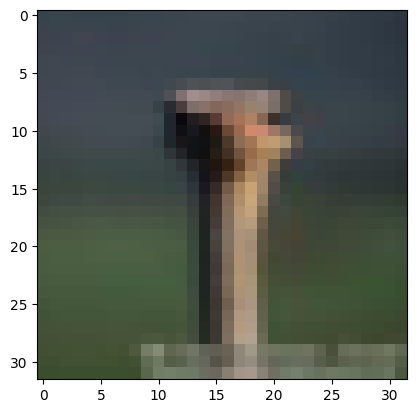

In [30]:
imshow(images[0])
classes[labels[0]]

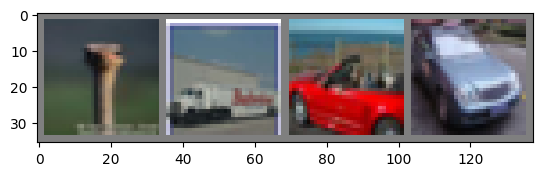

In [33]:
imshow(torchvision.utils.make_grid(images))

## Define the Neural Network

In [ ]:
class ImageClassifierNeuralNetwork(nn.Module):
    def __init__(self):
        super(ImageClassifierNeuralNetwork, self).__init__()

        self.conv_1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv_2 = nn.Conv2d(6, 16, 5)
        self.fc_1 = nn.Linear(16*5*5, 120)
        self.fc_2 = nn.Linear(120 ,80)
        self.fc_3 = nn.Linear(80, 10)
